## LAB1: Gerações, representações e transformações de dados multivariados

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: 
## Número:

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab1.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.
# Ficheiros que não se encontrem em conformidade com o formato especificado não serão corrigidos!

<hr style="border:2px solid black"> </hr>

##### Pergunta 1:
## 1. Gere 5000 (cinco mil) pontos a duas dimensões, com distribuição gaussiana de média nula e matriz de covariância igual à identidade. Os pontos gerados deverão estar numa matrix "X" de 2x5000.
## 2. Visualize os pontos gerados. Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala (plt.axis('scaled'))

Média X:  [-0.01748086  0.00483655]
Covariancia X: 
 [[ 1.02130842 -0.03907437]
 [-0.03907437  1.00822887]]


(-4.036567679675077, 4.038086126531038, -3.748569537621041, 3.7843040017789185)

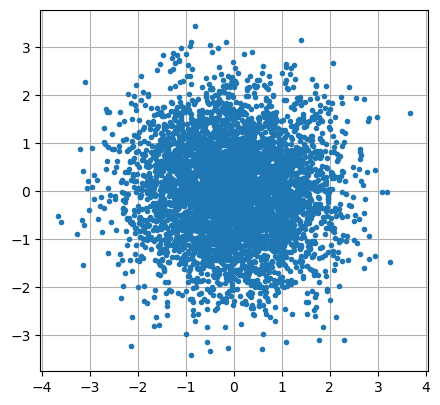

In [14]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.linalg as la

N = 5000
X = rd.randn(2, N)

print("Média X: ", np.mean(X, axis=1))
print("Covariancia X: \n",np.cov(X))

plt.figure(figsize=(5,5))
plt.plot(X[0,:], X[1, :], '.')
plt.grid(True)
plt.axis('scaled')

# Pergunta 2:
## 1. Através duma transformação matricial do tipo $X2=A\times X+b$ (A matriz de 2x2, b vetor de 2x1), transforme os dados de modo a estes terem média $\mu=\begin{bmatrix}-3\\+1\end{bmatrix}$ e matriz de covariância $\Sigma=\begin{bmatrix}2.5&1\\1&0.5\end{bmatrix}$.
## 2. Visualize os pontos gerados (matriz X2). Vizualise igualmente no mesmo gráfico os pontos da alínea anterior. Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala. 

Média X2:  [-3.02380302  0.99367784]
Convariancia X2: 
 [[2.49138962 0.97896417]
 [0.97896417 0.48784714]]


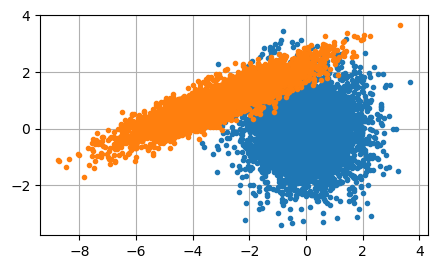

In [16]:
S = np.array([[2.5, 1],[1, 0.5]])
m = np.array([-3, 1])

A = la.sqrtm(S)

X2 = np.dot(A, X) + m[:, np.newaxis]


plt.figure(figsize=(5,5))
plt.plot(X[0,:], X[1, :], '.')
plt.plot(X2[0,:], X2[1, :], '.')
plt.grid(True)
plt.axis('scaled')

print("Média X2: ", np.mean(X2, axis=1))
print("Convariancia X2: \n", np.cov(X2))



# Pergunta 3:
## Considere uma matriz X3 de 2x10000 obtida com a concatenação das matrizes X e X2. Faça os histogramas de cada dimensão dos dados da matriz X3. Certifique-se que o número de intervalos é apropriado, e a sua largura também, para uma boa visualização dos mesmos.

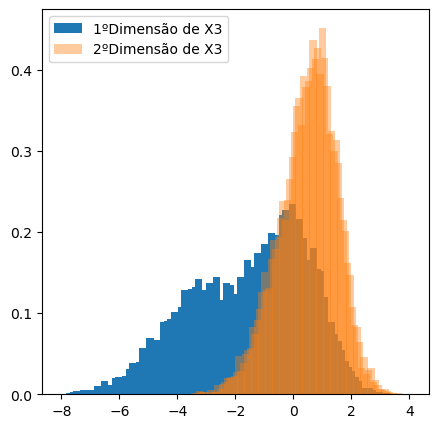

In [38]:
X3 = np.hstack((X, X2))

h1, b1 = np.histogram(X3[0, :], np.linspace(-8, 4, 101), density=True)
b1 = (b1[1:] + b1[:-1])/2

h2, b2 = np.histogram(X3[1, :], np.linspace(-4, 4, 101), density=True)
b2 = (b2[1:] + b2[:-1])/2


plt.figure(figsize=(5,5))
plt.bar(b1, h1, alpha=1, width=0.25)
plt.bar(b2, h2, alpha=0.4, width=0.25)
plt.legend(['1ºDimensão de X3','2ºDimensão de X3'])